In [4]:
import pandas as pd
import numpy as np


In [5]:
dataset = pd.read_csv('detect_bc.csv')

In [6]:
dataset 
#displays the first five rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [47]:
dataset.isnull().sum()

# the dataset is clean with no null values

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
dataset['diagnosis'].value_counts()

# since the data is roughly split equally between 'M' and 'B', its valid
#otherwise we would have had to break it down and remove repetetive classifiers

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
dataset.describe()
#statistical representation of the coloumn attributes

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [10]:
# our main objective here is finding the correlation between the different features and breast cancer detection,
# and prediciting M or B on unseen data
# we will be dropping out irrelevant coloumns such as id and unnamed 32

In [11]:
extra_col = ['id', 'Unnamed: 32']

dataset = dataset.drop(extra_col, axis = 1, inplace = False)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
dataset.shape


(569, 31)

In [13]:
#it's important in supervised learning to split the training and test/validation data to train a model before its operated on unseen data


data = dataset.sample(frac=0.85, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

# NOTE: the 569 rows are divided into 484 and 85 rows with the 95-5 ratio
# By default, the system divides 484 rows into 70-30 ratio which can be changed by train_size parameter

Data for Modeling: (484, 31)
Unseen Data For Predictions: (85, 31)


In [14]:
from pycaret.classification import *

exp_clf101 = setup(data = data, target = 'diagnosis', session_id=123) 

# we setup the pycare module and set diagnosis as the target variable 
# in case if we dont initialise session_id, the system will randomly choose one from the dataset


Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"B: 0, M: 1"
3,Original Data,"(484, 31)"
4,Missing Values,False
5,Numeric Features,30
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [15]:
dataset.shape

(569, 31)

In [16]:
compare_models()

#this function lists all machine learning models and computes the accuracy and other classification metrics
# the highlighted values represent the max values of a given coloumn
# the programmer can then select a model based on the ideal characterisitics
# usually, a model is selected based on accuracy or AUC parameters.

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extreme Gradient Boosting,0.9704,0.9947,0.9596,0.9619,0.9599,0.9364,0.9375,0.2851
1,Light Gradient Boosting Machine,0.9644,0.9952,0.9519,0.9543,0.9522,0.9238,0.9250,0.2186
2,Ridge Classifier,0.9586,0.0000,0.9051,0.9840,0.9412,0.9094,0.9131,0.3378
3,Linear Discriminant Analysis,0.9586,0.9945,0.9051,0.9833,0.9412,0.9096,0.9129,0.0500
4,Extra Trees Classifier,0.9586,0.9959,0.9282,0.9629,0.9434,0.9107,0.9133,0.3126
5,CatBoost Classifier,0.9586,0.9955,0.9205,0.9671,0.9423,0.9100,0.9118,13.7016
6,Ada Boost Classifier,0.9527,0.9936,0.9218,0.9524,0.9342,0.8975,0.9006,0.2320
7,Gradient Boosting Classifier,0.9527,0.9947,0.9282,0.9456,0.9358,0.8983,0.8997,0.4268
8,Quadratic Discriminant Analysis,0.9523,0.9907,0.9429,0.9307,0.9353,0.8975,0.8993,1.0261
9,Random Forest Classifier,0.9497,0.9879,0.9135,0.9545,0.9311,0.8917,0.8951,0.1223


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=123, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [17]:
# selecting best model
best = automl()
best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=123, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [18]:
#since xgboost is the best perfoming model based on accuracy and other factors, we proceed with it
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9706,0.9962,0.9167,1.0000,0.9565,0.9344,0.9364
1,0.9412,0.9811,0.9167,0.9167,0.9167,0.8712,0.8712
2,0.9706,0.9890,1.0000,0.9286,0.9630,0.9386,0.9404
3,0.9706,0.9927,0.9231,1.0000,0.9600,0.9368,0.9387
4,0.9706,0.9963,1.0000,0.9286,0.9630,0.9386,0.9404
5,0.9706,1.0000,1.0000,0.9286,0.9630,0.9386,0.9404
6,0.9706,1.0000,0.9231,1.0000,0.9600,0.9368,0.9387
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9394,0.9921,0.9167,0.9167,0.9167,0.8690,0.8690


In [19]:
# this function tunes the metrics to improve the accuracy of the attributes
# the values might be less  after tuning however it should validate once the SD is accounted for

tuned_xgboost = tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9706,1.0000,0.9167,1.0000,0.9565,0.9344,0.9364
1,0.9412,0.9924,0.9167,0.9167,0.9167,0.8712,0.8712
2,0.9118,0.9890,0.8462,0.9167,0.8800,0.8104,0.8120
3,0.9706,0.9927,0.9231,1.0000,0.9600,0.9368,0.9387
4,0.9706,0.9927,1.0000,0.9286,0.9630,0.9386,0.9404
5,0.9706,1.0000,1.0000,0.9286,0.9630,0.9386,0.9404
6,0.9706,1.0000,0.9231,1.0000,0.9600,0.9368,0.9387
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9697,0.9921,1.0000,0.9231,0.9600,0.9357,0.9376


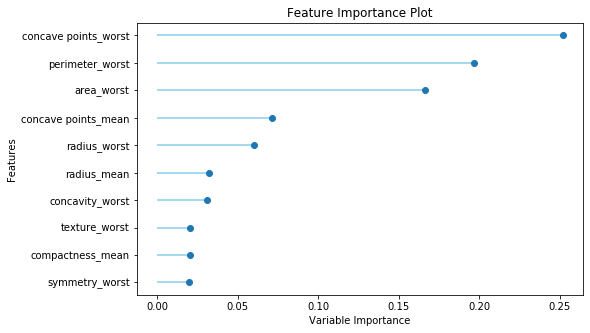

In [20]:
plot_model(tuned_xgboost, plot='feature')

In [46]:
evaluate_model(tuned_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

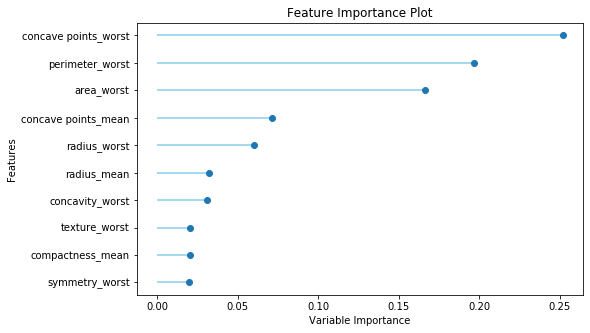

In [22]:
plot_model(tuned_xgboost, plot='feature')

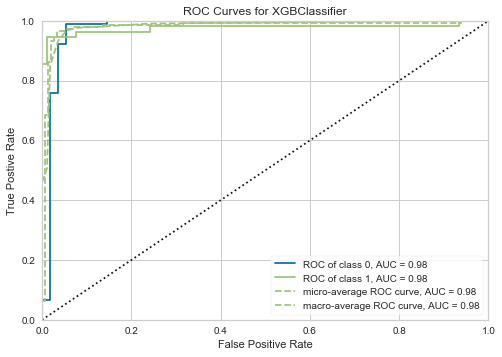

In [23]:
plot_model(tuned_xgboost, plot='auc')

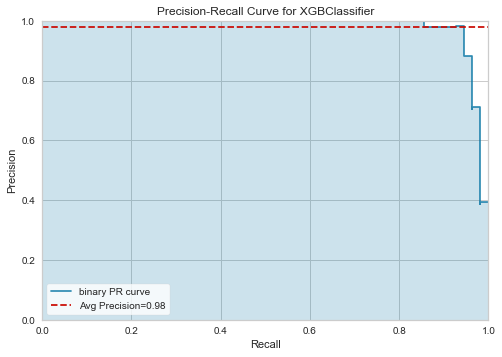

In [24]:
plot_model(tuned_xgboost, plot='pr')

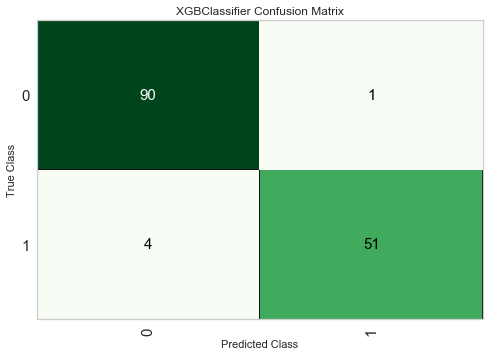

In [25]:
plot_model(tuned_xgboost, plot='confusion_matrix')

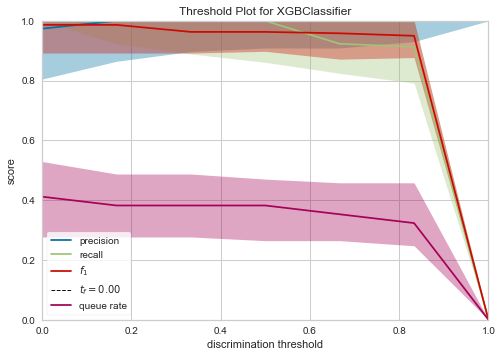

In [26]:
plot_model(tuned_xgboost, plot='threshold')

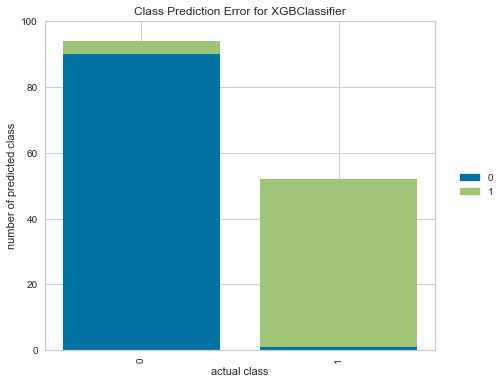

In [27]:
plot_model(tuned_xgboost, plot='error')

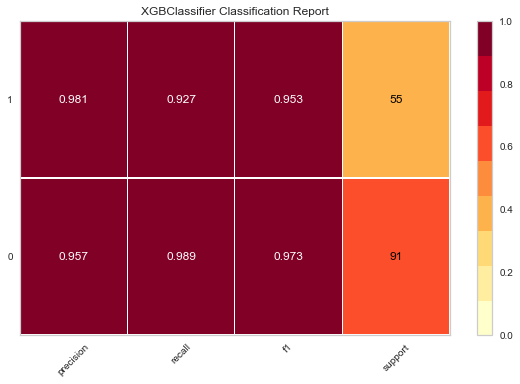

In [28]:
plot_model(tuned_xgboost, plot='class_report')

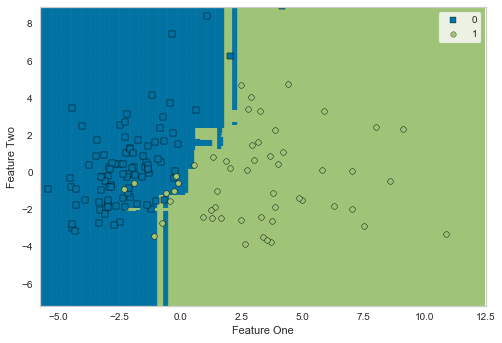

In [29]:
plot_model(tuned_xgboost, plot='boundary')

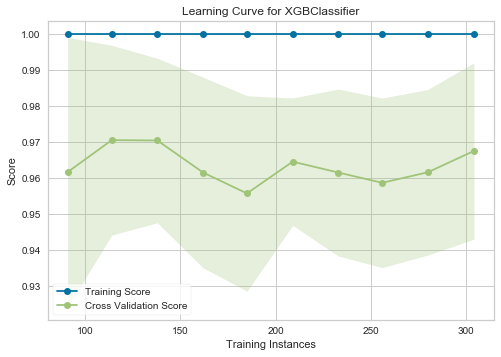

In [30]:
plot_model(tuned_xgboost, plot='learning')

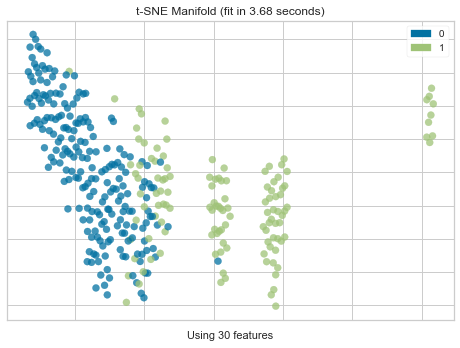

In [31]:
plot_model(tuned_xgboost, plot='manifold')

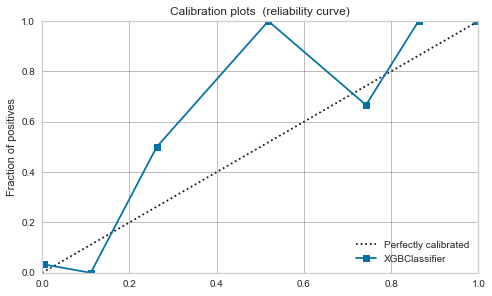

In [32]:
plot_model(tuned_xgboost, plot='calibration')


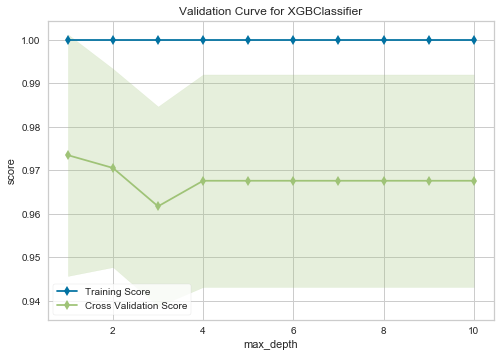

In [33]:
plot_model(tuned_xgboost, plot='vc')


In [36]:
# the above operations were all on the 70% training data
# we now test our 30% test data using the 70% data's newly trained model

predict_model(tuned_xgboost)

# the different between training and set accuracy is not that significant 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9658,0.9762,0.9273,0.9808,0.9533,0.9263,0.9272


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,Label,Score
0,14.87,16.67,98.64,682.5,0.11620,0.16490,0.169000,0.08923,0.2157,0.06768,...,1095.0,0.18780,0.4480,0.47040,0.20270,0.3585,0.10650,1,1,0.9992
1,11.64,18.33,75.17,412.5,0.11420,0.10170,0.070700,0.03485,0.1801,0.06520,...,521.7,0.16880,0.2660,0.28730,0.12180,0.2806,0.09097,0,0,0.0018
2,11.06,17.12,71.25,366.5,0.11940,0.10710,0.040630,0.04268,0.1954,0.07976,...,411.1,0.16620,0.2031,0.12560,0.09514,0.2780,0.11680,0,0,0.0002
3,13.61,24.98,88.05,582.7,0.09488,0.08511,0.086250,0.04489,0.1609,0.05871,...,906.5,0.12650,0.1943,0.31690,0.11840,0.2651,0.07397,1,1,0.8403
4,13.75,23.77,88.54,590.0,0.08043,0.06807,0.046970,0.02344,0.1773,0.05429,...,706.0,0.09368,0.1442,0.13590,0.06106,0.2663,0.06321,0,0,0.0013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,11.16,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.01076,0.1615,0.06144,...,458.0,0.12820,0.1108,0.03582,0.04306,0.2976,0.07123,0,0,0.0017
142,11.74,14.02,74.24,427.3,0.07813,0.04340,0.022450,0.02763,0.2101,0.06113,...,533.7,0.10360,0.0850,0.06735,0.08290,0.3101,0.06688,0,0,0.0002
143,15.46,11.89,102.50,736.9,0.12570,0.15550,0.203200,0.10970,0.1966,0.07069,...,1102.0,0.15310,0.3583,0.58300,0.18270,0.3216,0.10100,1,1,0.9761
144,15.19,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.02657,0.1721,0.05544,...,819.1,0.11260,0.1737,0.13620,0.08178,0.2487,0.06766,0,0,0.0013


In [37]:
# this function fits the model onto the complete dataset including the test/hold-out sample 30%. 
# The purpose of this function is to train the model on the complete dataset before it is deployed on the 5% dataset.

final_xgboost = finalize_model(tuned_xgboost)
final_xgboost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.16, max_delta_step=0, max_depth=110,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=123, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [38]:
# the entire 70-30 dataset is used as a training model which will be used on the unseen dataset
predict_model(final_xgboost)

# we achieve a 1.0 in the metrics as we optimise the hyperparameters once again when both the training-test are iterated upon.
# this however does not mean the model predicts the M or B with a 100% accuracy
# as seen below, the model has a very high accuracy classifying M with ~99% accuracy

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,Label,Score
0,14.87,16.67,98.64,682.5,0.11620,0.16490,0.169000,0.08923,0.2157,0.06768,...,1095.0,0.18780,0.4480,0.47040,0.20270,0.3585,0.10650,1,1,0.9998
1,11.64,18.33,75.17,412.5,0.11420,0.10170,0.070700,0.03485,0.1801,0.06520,...,521.7,0.16880,0.2660,0.28730,0.12180,0.2806,0.09097,0,0,0.0025
2,11.06,17.12,71.25,366.5,0.11940,0.10710,0.040630,0.04268,0.1954,0.07976,...,411.1,0.16620,0.2031,0.12560,0.09514,0.2780,0.11680,0,0,0.0001
3,13.61,24.98,88.05,582.7,0.09488,0.08511,0.086250,0.04489,0.1609,0.05871,...,906.5,0.12650,0.1943,0.31690,0.11840,0.2651,0.07397,1,1,0.9974
4,13.75,23.77,88.54,590.0,0.08043,0.06807,0.046970,0.02344,0.1773,0.05429,...,706.0,0.09368,0.1442,0.13590,0.06106,0.2663,0.06321,0,0,0.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,11.16,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.01076,0.1615,0.06144,...,458.0,0.12820,0.1108,0.03582,0.04306,0.2976,0.07123,0,0,0.0049
142,11.74,14.02,74.24,427.3,0.07813,0.04340,0.022450,0.02763,0.2101,0.06113,...,533.7,0.10360,0.0850,0.06735,0.08290,0.3101,0.06688,0,0,0.0029
143,15.46,11.89,102.50,736.9,0.12570,0.15550,0.203200,0.10970,0.1966,0.07069,...,1102.0,0.15310,0.3583,0.58300,0.18270,0.3216,0.10100,1,1,0.9922
144,15.19,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.02657,0.1721,0.05544,...,819.1,0.11260,0.1737,0.13620,0.08178,0.2487,0.06766,0,0,0.0003


In [39]:
# Label is the prediction and score is the probability of the prediction.

unseen_predictions = predict_model(final_xgboost, data=data_unseen)
unseen_predictions
#unseen_predictions.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Label,Score
0,B,15.73,11.28,102.80,747.2,0.10430,0.12990,0.11910,0.06211,0.1784,...,112.50,854.3,0.15410,0.29790,0.4004,0.14520,0.2557,0.08181,0,0.0519
1,B,12.45,16.41,82.85,476.7,0.09514,0.15110,0.15440,0.04846,0.2082,...,97.82,580.6,0.11750,0.40610,0.4896,0.13420,0.3231,0.10340,0,0.0010
2,B,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,...,106.00,831.0,0.11420,0.20700,0.2437,0.07828,0.2455,0.06596,0,0.0041
3,M,19.44,18.82,128.10,1167.0,0.10890,0.14480,0.22560,0.11940,0.1823,...,153.90,1740.0,0.15140,0.37250,0.5936,0.20600,0.3266,0.09009,1,0.9998
4,B,11.68,16.17,75.49,420.5,0.11280,0.09263,0.04279,0.03132,0.1853,...,86.57,549.8,0.15260,0.14770,0.1490,0.09815,0.2804,0.08024,0,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,1,0.9999
81,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,1,0.9997
82,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,1,0.9975
83,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,1,0.9999


In [40]:
save_model(final_xgboost,'Final XGB Model')

Transformation Pipeline and Model Succesfully Saved


In [41]:
saved_final_xgboost = load_model('Final XGB Model')

Transformation Pipeline and Model Sucessfully Loaded


In [42]:
# our model is now ready to be deployed on any unseen data

In [43]:
new_prediction = predict_model(saved_final_xgboost, data=data_unseen)

In [44]:
new_prediction

# the label and score can be found on the right end coloumn

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Label,Score
0,B,15.73,11.28,102.80,747.2,0.10430,0.12990,0.11910,0.06211,0.1784,...,112.50,854.3,0.15410,0.29790,0.4004,0.14520,0.2557,0.08181,0,0.0519
1,B,12.45,16.41,82.85,476.7,0.09514,0.15110,0.15440,0.04846,0.2082,...,97.82,580.6,0.11750,0.40610,0.4896,0.13420,0.3231,0.10340,0,0.0010
2,B,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,...,106.00,831.0,0.11420,0.20700,0.2437,0.07828,0.2455,0.06596,0,0.0041
3,M,19.44,18.82,128.10,1167.0,0.10890,0.14480,0.22560,0.11940,0.1823,...,153.90,1740.0,0.15140,0.37250,0.5936,0.20600,0.3266,0.09009,1,0.9998
4,B,11.68,16.17,75.49,420.5,0.11280,0.09263,0.04279,0.03132,0.1853,...,86.57,549.8,0.15260,0.14770,0.1490,0.09815,0.2804,0.08024,0,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,1,0.9999
81,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,1,0.9997
82,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,1,0.9975
83,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,1,0.9999
